In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
MCI_EDA = pd.read_csv('full_db.csv')
MCI_EDA.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,Longtiude,Latitude
0,1,GO-20141262074,2014-01-01 05:00:00+00:00,1998-06-01 04:00:00+00:00,2014,January,1,1,Wednesday,12,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,2,GO-20141260701,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,3,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,3,GO-20141260889,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,...,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,4,GO-20141260973,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,...,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,5,GO-20141261050,2014-01-01 05:00:00+00:00,2014-01-01 05:00:00+00:00,2014,January,1,1,Wednesday,4,...,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946


In [4]:
MCI_EDA.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,lowinc_percent,Density Per Square km,Female Unemployment Ratio,Male Unemployment Ratio,No Diploma Certificate Degree Percent,No Official Lang Percent,UCR_CODE,UCR_EXT,Longtiude,Latitude
count,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,323296.000000,317833.000000,317833.000000,317833.000000,317833.000000,317833.000000,317833.000000,323296.000000,323296.000000,323296.000000,323296.000000
mean,161648.500000,2018.158115,15.744995,187.147781,12.926696,2018.094749,15.453476,186.427852,12.893389,27.681781,7158.711672,8.820945,8.230582,0.108116,0.046292,1704.459133,146.771216,-79.475536,43.144559
std,93327.660651,2.571347,8.769573,103.790065,6.244720,2.661941,8.921998,104.146684,6.808623,11.339778,5961.155077,2.233335,1.865964,0.072321,0.038662,327.123233,52.068977,0.694300,4.925584
min,1.000000,2014.000000,1.000000,1.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,4.100000,1040.000000,4.300000,4.100000,0.010834,0.002087,1410.000000,100.000000,-85.488744,0.000000
25%,80824.750000,2016.000000,8.000000,99.000000,8.000000,2016.000000,8.000000,98.000000,7.000000,19.900000,3377.000000,6.900000,6.900000,0.041132,0.021904,1430.000000,100.000000,-79.478939,43.659896
50%,161648.500000,2018.000000,16.000000,190.000000,13.000000,2018.000000,15.000000,189.000000,14.000000,28.100000,5395.000000,8.600000,8.300000,0.107420,0.036844,1450.000000,100.000000,-79.396397,43.699304
75%,242472.250000,2020.000000,23.000000,277.000000,18.000000,2020.000000,23.000000,276.000000,19.000000,35.600000,8943.000000,10.400000,9.500000,0.147957,0.058537,2120.000000,200.000000,-79.327244,43.750882
max,323296.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,60.100000,44321.000000,15.200000,14.100000,0.334403,0.265881,2135.000000,230.000000,-78.551414,44.351392


In [22]:
MCI_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   OBJECTID                               323296 non-null  int64  
 1   EVENT_UNIQUE_ID                        323296 non-null  object 
 2   REPORT_DATE                            323296 non-null  object 
 3   OCC_DATE                               323296 non-null  object 
 4   REPORT_YEAR                            323296 non-null  int64  
 5   REPORT_MONTH                           323296 non-null  object 
 6   REPORT_DAY                             323296 non-null  int64  
 7   REPORT_DOY                             323296 non-null  int64  
 8   REPORT_DOW                             323296 non-null  object 
 9   REPORT_HOUR                            323296 non-null  int64  
 10  OCC_YEAR                               323296 non-null  

In [73]:
MCI_EDA['OCC_YEAR'] = MCI_EDA['OCC_YEAR'].astype(int)
MCI_EDA['OCC_DAY'] = MCI_EDA['OCC_DAY'].astype(int)

In [5]:
MCI_EDA.shape

(323296, 35)

In [6]:
MCI_EDA.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'lowinc_percent', 'Density Per Square km', 'Female Unemployment Ratio',
       'Male Unemployment Ratio', 'No Diploma Certificate Degree Percent',
       'No Official Lang Percent', 'DIVISION', 'LOCATION_TYPE',
       'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'Longtiude', 'Latitude'],
      dtype='object')

In [7]:
#There are 141 neighbourhood
len(MCI_EDA.NEIGHBOURHOOD_140.unique())

141

In [8]:
# Top 10 area/neighbourhood has higher crime rate
MCI_EDA.NEIGHBOURHOOD_140.value_counts().nlargest(10)

NEIGHBOURHOOD_140
Waterfront Communities-The Island (77)    12321
Church-Yonge Corridor (75)                11113
West Humber-Clairville (1)                 8773
Bay Street Corridor (76)                   8527
Moss Park (73)                             7663
York University Heights (27)               6277
Downsview-Roding-CFB (26)                  6199
Kensington-Chinatown (78)                  6045
Woburn (137)                               5709
NSA                                        5463
Name: count, dtype: int64

In [9]:
# what kind of spaces do most crimes occur at
MCI_EDA.PREMISES_TYPE.value_counts()

PREMISES_TYPE
Apartment           77032
House               58263
Commercial          52199
Outside             52028
Parking Lots        27699
Other               19154
Bar / Restaurant    12693
Transit              9386
Educational          8179
Open Areas           6663
Name: count, dtype: int64

In [30]:
#years with the higer number of crimes

MCI_EDA.OCC_YEAR.value_counts().nlargest(10)

OCC_YEAR
2022    40226
2019    40026
2018    37490
2017    35508
2020    35065
2021    34529
2016    33623
2015    32909
2014    32467
2013      614
Name: count, dtype: int64

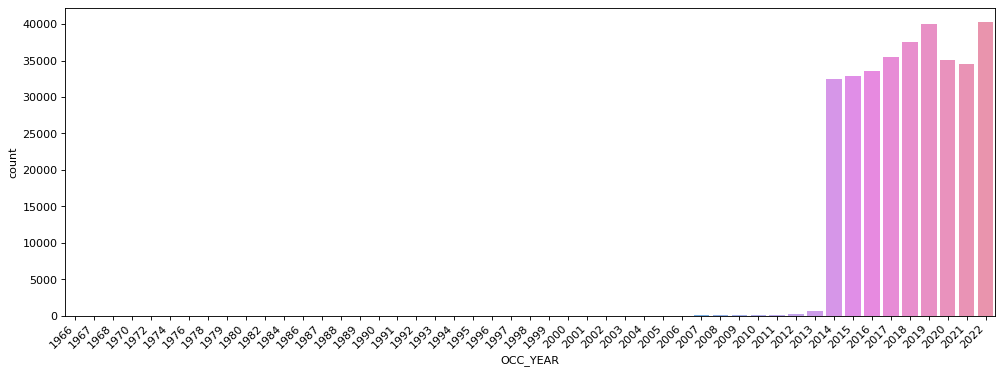

In [64]:
plt.figure(figsize=(15, 5), dpi=80)
plot= sns.countplot(x='OCC_YEAR', data=MCI_EDA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

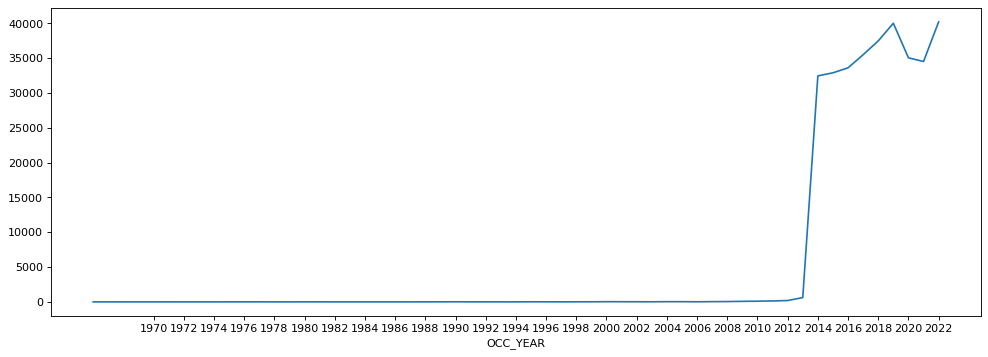

In [62]:
import numpy as np
plt.figure(figsize=(15, 5), dpi=80)
MCI_EDA.groupby('OCC_YEAR')['OCC_YEAR'].size().plot()
plt.xticks(np.arange(1970, 2023, 2))
plt.show()

In [88]:
MCI_EDA.REPORT_YEAR.value_counts()


REPORT_YEAR
2022    41521
2019    40118
2018    37371
2020    35168
2017    35145
2021    35097
2016    33529
2015    32880
2014    32467
Name: count, dtype: int64

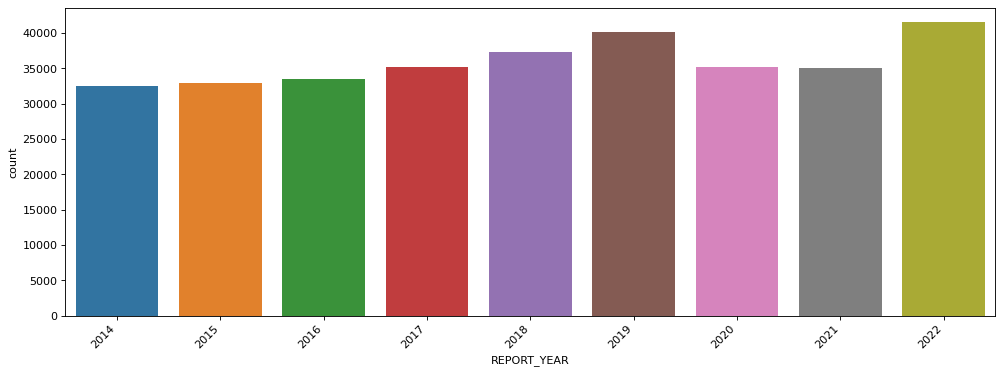

In [65]:
plt.figure(figsize=(15, 5), dpi=80)
plot= sns.countplot(x='REPORT_YEAR', data=MCI_EDA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

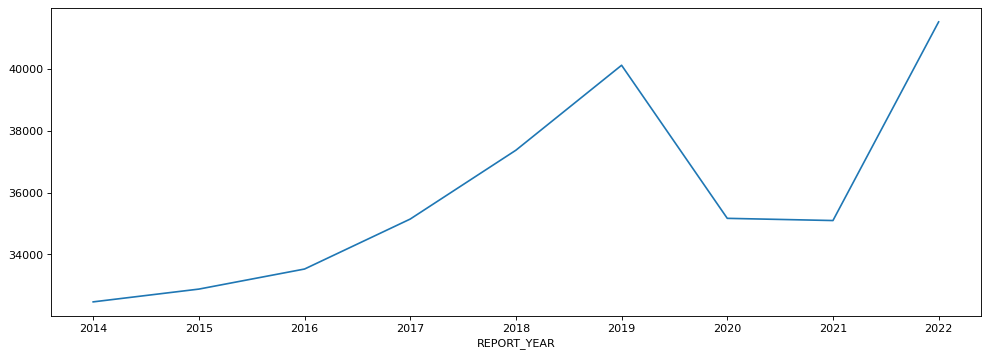

In [68]:
plt.figure(figsize=(15, 5), dpi=80)
MCI_EDA.groupby('REPORT_YEAR')['REPORT_YEAR'].size().plot()
plt.show()

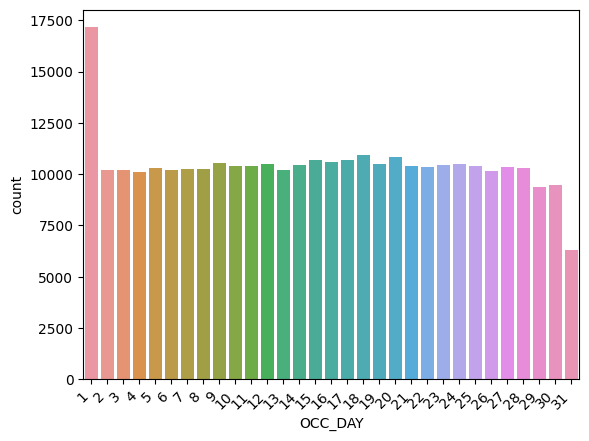

In [74]:
plot= sns.countplot(x='OCC_DAY', data=MCI_EDA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

In [75]:
stat, p = stats.shapiro(MCI_EDA['OCC_DAY'])
if p > 0.05:
    print (p, '\nNormally distributed')
else: 
    print (p, '\nReject the H0, not normally distributed')

0.0 
Reject the H0, not normally distributed


c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: xlabel='OCC_HOUR', ylabel='count'>

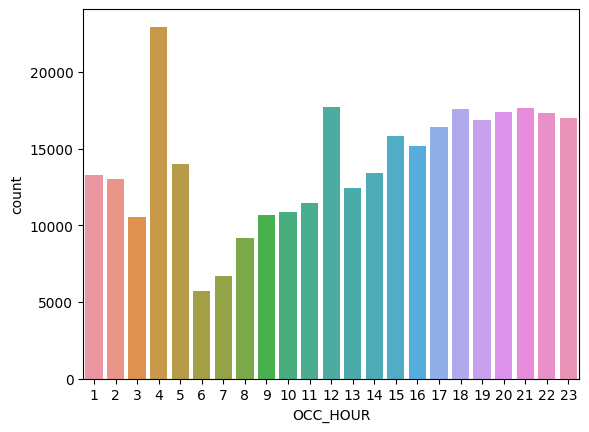

In [76]:
sns.countplot(x='OCC_HOUR', data=MCI_EDA)

In [77]:
stat, p = stats.shapiro(MCI_EDA['OCC_HOUR'])
if p > 0.05:
    print (p, '\nNormally distributed')
else: 
    print (p, '\nReject the H0, not normally distributed')

0.0 
Reject the H0, not normally distributed


c:\Abubaker\all\Study_School_Univ_DCare_Cert\Mohammed\LightHouse - DataSciense BootCamp\pythonenv\gen\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


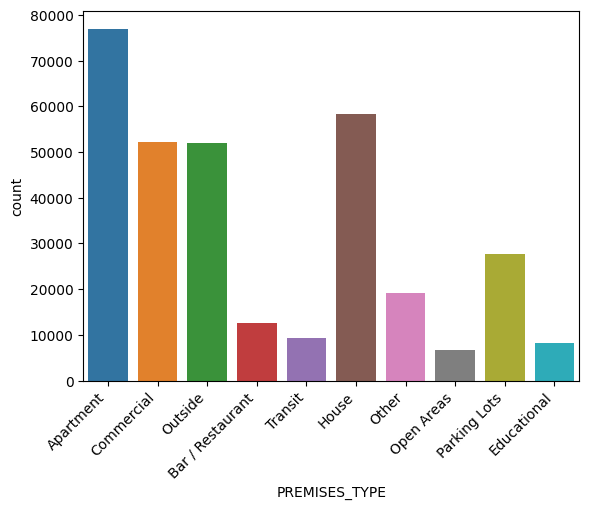

In [78]:
plot = sns.countplot(x='PREMISES_TYPE', data=MCI_EDA)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

<Axes: xlabel='MCI_CATEGORY', ylabel='count'>

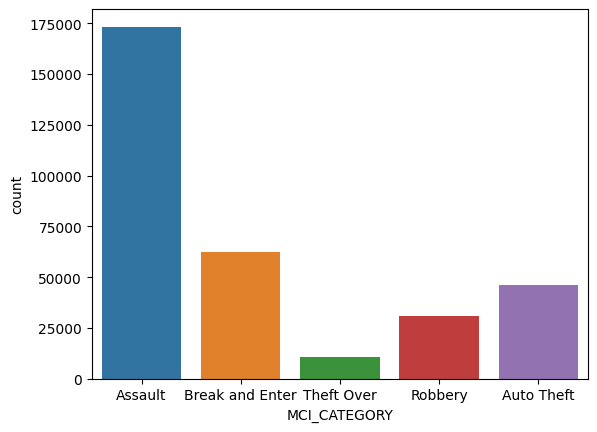

In [10]:
sns.countplot(x='MCI_CATEGORY', data=MCI_EDA)

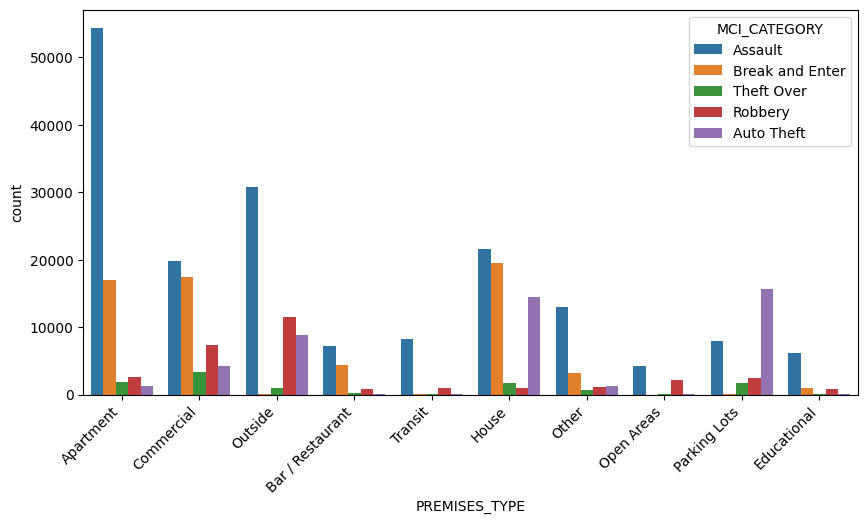

In [81]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=MCI_EDA,
    x='PREMISES_TYPE',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

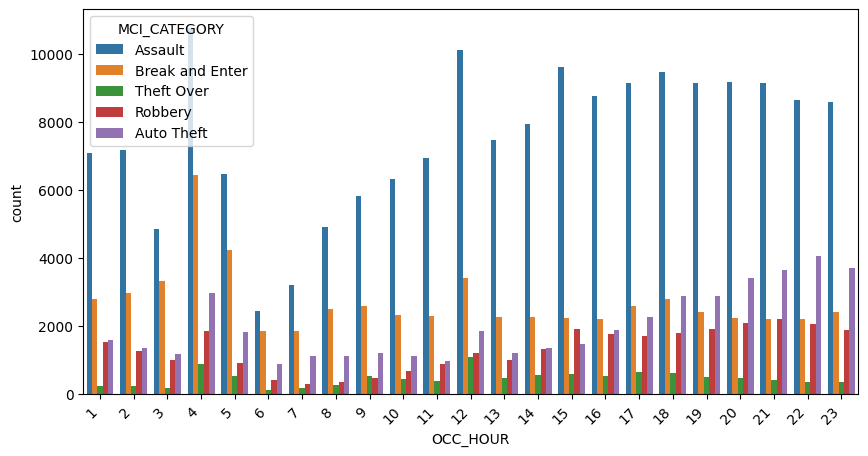

In [205]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=MCI_EDA,
    x='OCC_HOUR',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

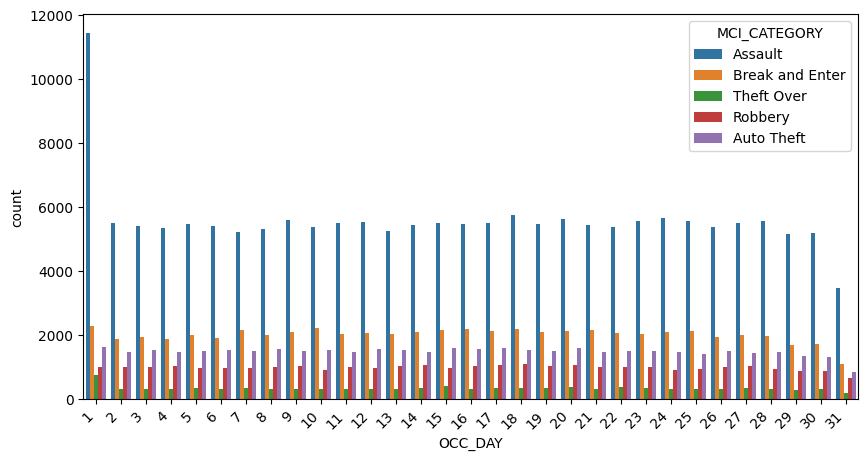

In [206]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=MCI_EDA,
    x='OCC_DAY',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

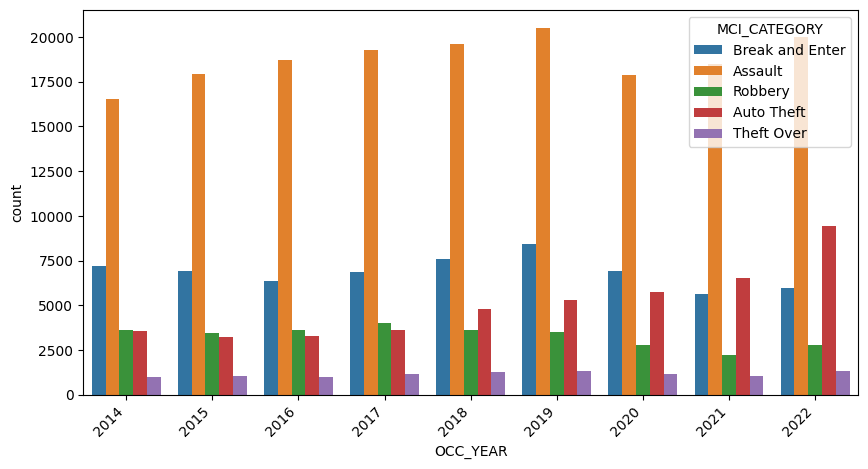

In [237]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=MCI_filter2,
    x='OCC_YEAR',
    hue='MCI_CATEGORY'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [82]:
# Label encode
label_encoder = preprocessing.LabelEncoder()
MCI_EDA['PREMISES_TYPE_Code']= label_encoder.fit_transform(MCI_EDA['PREMISES_TYPE'])  
MCI_EDA['MCI_CATEGORY_Code']= label_encoder.fit_transform(MCI_EDA['MCI_CATEGORY']) 

In [83]:
MCI_EDA['PREMISES_TYPE_Code'].unique()
MCI_EDA['MCI_CATEGORY_Code'].unique()

array([0, 2, 4, 3, 1])

In [123]:
MCI_EDA[['MCI_CATEGORY_Code', 'MCI_CATEGORY']]

,MCI_CATEGORY_Code,MCI_CATEGORY
0,0,Assault
1,2,Break and Enter
2,0,Assault
3,4,Theft Over
4,0,Assault
...,...,...
323291,2,Break and Enter
323292,2,Break and Enter
323293,0,Assault
323294,0,Assault


In [90]:

MCI_EDA.info(all)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 37 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   OBJECTID                               323296 non-null  int64  
 1   EVENT_UNIQUE_ID                        323296 non-null  object 
 2   REPORT_DATE                            323296 non-null  object 
 3   OCC_DATE                               323296 non-null  object 
 4   REPORT_YEAR                            323296 non-null  int64  
 5   REPORT_MONTH                           323296 non-null  object 
 6   REPORT_DAY                             323296 non-null  int64  
 7   REPORT_DOY                             323296 non-null  int64  
 8   REPORT_DOW                             323296 non-null  object 
 9   REPORT_HOUR                            323296 non-null  int64  
 10  OCC_YEAR                               323296 non-null  

In [100]:
MCI_filter = MCI_EDA[MCI_EDA.HOOD_140 != 'NSA']
#MCI_filter.head()

In [171]:
MCI_filter['HOOD_140'] = MCI_filter['HOOD_140'].astype(int)
MCI_filter['OCC_DOY'] = MCI_filter['OCC_DOY'].astype(int)
MCI_filter['Female Unemployment Ratio'] = MCI_EDA['Female Unemployment Ratio']

C:\Users\WithA\AppData\Local\Temp\ipykernel_13460\1980629041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCI_filter['HOOD_140'] = MCI_filter['HOOD_140'].astype(int)
C:\Users\WithA\AppData\Local\Temp\ipykernel_13460\1980629041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCI_filter['OCC_DOY'] = MCI_filter['OCC_DOY'].astype(int)
C:\Users\WithA\AppData\Local\Temp\ipykernel_13460\1980629041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [230]:
MCI_filter2 = MCI_filter[MCI_filter['OCC_YEAR']>= 2014]
MCI_filter2.shape

(316452, 37)

In [231]:
MCI_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316452 entries, 1 to 323295
Data columns (total 37 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   OBJECTID                               316452 non-null  int64  
 1   EVENT_UNIQUE_ID                        316452 non-null  object 
 2   REPORT_DATE                            316452 non-null  object 
 3   OCC_DATE                               316452 non-null  object 
 4   REPORT_YEAR                            316452 non-null  int64  
 5   REPORT_MONTH                           316452 non-null  object 
 6   REPORT_DAY                             316452 non-null  int64  
 7   REPORT_DOY                             316452 non-null  int64  
 8   REPORT_DOW                             316452 non-null  object 
 9   REPORT_HOUR                            316452 non-null  int64  
 10  OCC_YEAR                               316452 non-null  int32

In [238]:
X = MCI_filter2[['OCC_DOY','OCC_HOUR','PREMISES_TYPE_Code','lowinc_percent','Female Unemployment Ratio','HOOD_140']]
y = MCI_filter2['MCI_CATEGORY_Code']

In [239]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(X)

In [240]:
X = pd.DataFrame(X_minmax,columns=['OCC_DOY','OCC_HOUR','PREMISES_TYPE_Code','lowinc_percent','Female Unemployment Ratio','HOOD_140'])
X.head()

,OCC_DOY,OCC_HOUR,PREMISES_TYPE_Code,lowinc_percent,Female Unemployment Ratio,HOOD_140
0,0.0,0.090909,0.222222,0.287500,0.192661,0.496403
1,0.0,0.136364,0.000000,0.782143,0.770642,0.525180
2,0.0,0.136364,0.777778,0.100000,0.146789,0.467626
3,0.0,0.045455,0.111111,0.376786,0.165138,0.546763
4,0.0,0.000000,0.222222,0.492857,0.440367,0.899281


In [241]:
y =list(y)
mn = sm.MNLogit(y,sm.add_constant(X))

In [242]:
model = mn.fit()
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 1.166787
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:               316452
Model:                        MNLogit   Df Residuals:                   316424
Method:                           MLE   Df Model:                           24
Date:                Fri, 14 Jul 2023   Pseudo R-squ.:                 0.07936
Time:                        01:02:21   Log-Likelihood:            -3.6923e+05
converged:                       True   LL-Null:                   -4.0106e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      y=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.1434      0.024    -87.946      0.000      -2.

In [243]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [244]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [245]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[27046  2224  3163  1119    98]
 [ 3829  4209   696   332    52]
 [ 6276   842  5096   237    39]
 [ 3799   613   512  1075    21]
 [ 1184   348   368    87    26]]


In [185]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[27345  2341  3153  1222    99]
 [ 3667  4248   747   380    52]
 [ 6299   800  5005   243    44]
 [ 3607   632   472  1101    14]
 [ 1228   362   402    82    22]]


In [246]:
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71     33650
           1       0.51      0.46      0.49      9118
           2       0.52      0.41      0.46     12490
           3       0.38      0.18      0.24      6020
           4       0.11      0.01      0.02      2013

    accuracy                           0.59     63291
   macro avg       0.43      0.37      0.38     63291
weighted avg       0.56      0.59      0.56     63291



In [247]:
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71     33650
           1       0.51      0.46      0.49      9118
           2       0.52      0.41      0.46     12490
           3       0.38      0.18      0.24      6020
           4       0.11      0.01      0.02      2013

    accuracy                           0.59     63291
   macro avg       0.43      0.37      0.38     63291
weighted avg       0.56      0.59      0.56     63291



In [248]:
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Accuracy: 0.591742901834384


In [249]:
from sklearn import svm

In [203]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [204]:
%%time
classifier_rf.fit(X_train, y_train)


CPU times: total: 1min 2s
Wall time: 33.2 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [191]:
classifier_rf.oob_score_

0.5585764514327515

In [167]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [168]:
from sklearn.model_selection import GridSearchCV

In [170]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


KeyboardInterrupt: 